In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler

# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('./iris-data.csv')
df.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [6]:
# categorical features

cols = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']

cat_list = []
for col in cols:
    cat = df[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
categories = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
categories

,categorical_variable,number_of_possible_values,values
0,petal_length_cm,43,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ..."
1,sepal_length_cm,38,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 5.7, ..."
2,sepal_width_cm,23,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ..."
3,petal_width_cm,23,"[0.2, 0.4, 0.3, nan, 0.1, 0.5, 0.6, 1.4, 1.5, ..."
4,class,5,"[Iris-setosa, Iris-setossa, Iris-versicolor, v..."


In [7]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

<Axes: title={'center': 'sepal_length_cm'}, xlabel='class'>

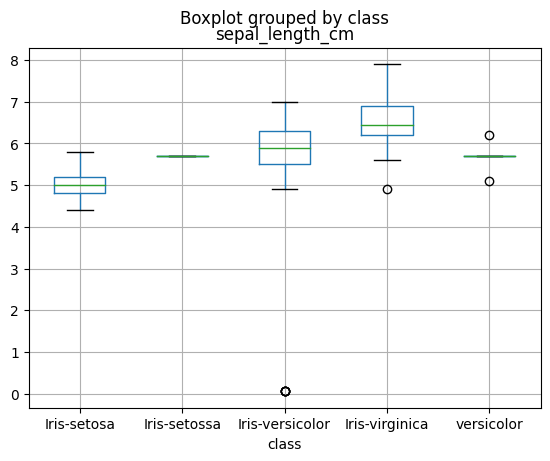

In [8]:
# df['sepal_length_cm'].plot.hist()
df.boxplot(column=['sepal_length_cm'], by='class')

In [9]:
df[df['class'] == 'Iris-versicolor'].sort_values('sepal_length_cm').head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
57,4.900,2.4,3.3,1.0,Iris-versicolor
60,5.000,2.0,3.5,1.0,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor
59,5.200,2.7,3.9,1.4,Iris-versicolor
84,5.400,3.0,4.5,1.5,Iris-versicolor


<Axes: title={'center': 'sepal_width_cm'}, xlabel='class'>

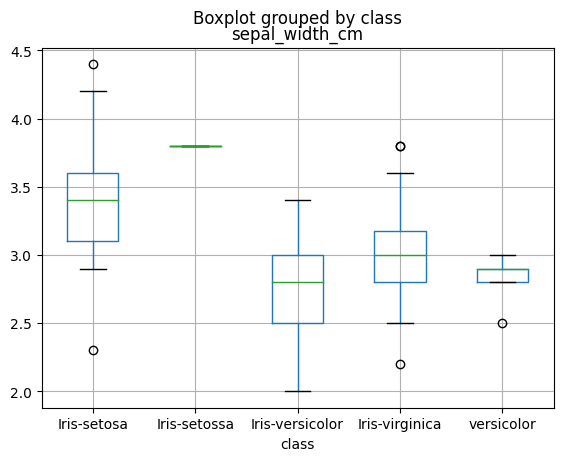

In [10]:
# df['sepal_width_cm'].plot.hist()
df.boxplot(column=['sepal_width_cm'], by='class')

<Axes: title={'center': 'petal_length_cm'}, xlabel='class'>

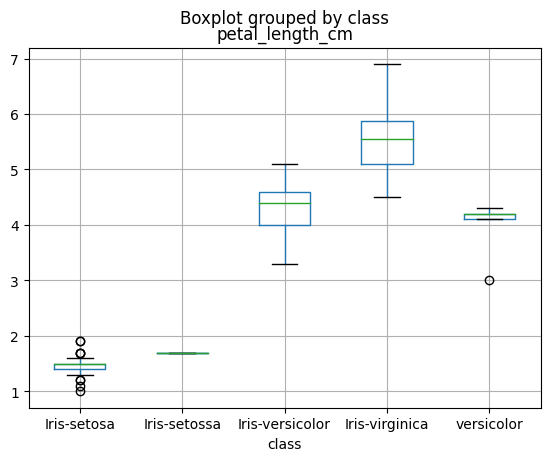

In [11]:
# df['petal_length_cm'].plot.hist()
df.boxplot(column=['petal_length_cm'], by='class')

<Axes: title={'center': 'petal_width_cm'}, xlabel='class'>

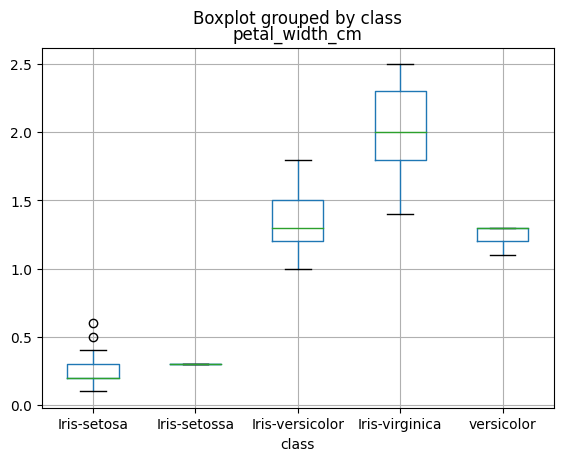

In [12]:
# df['petal_width_cm'].plot.hist()
df.boxplot(column=['petal_width_cm'], by='class')

[Text(0.5, 0, 'petal_width_cm'),
 Text(0, 0.5, 'petal_length_cm'),
 Text(0.5, 1.0, 'petal')]

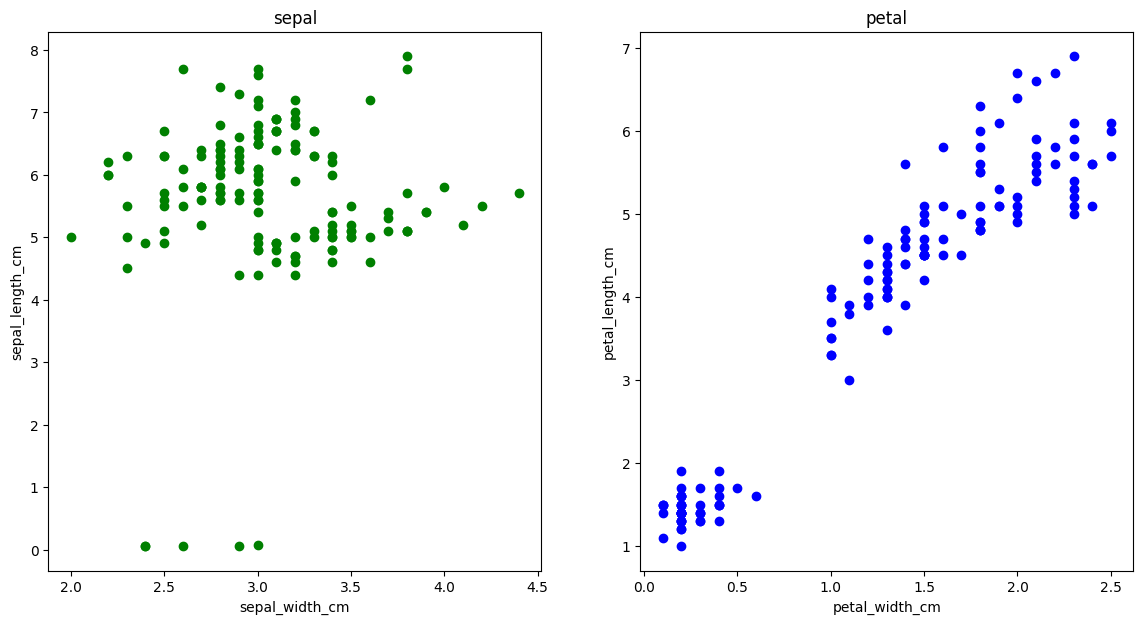

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(df['sepal_width_cm'], df['sepal_length_cm'], c='green')
axs[0].set(xlabel='sepal_width_cm', ylabel='sepal_length_cm', title='sepal')

axs[1].scatter(df['petal_width_cm'], df['petal_length_cm'], c='blue')
axs[1].set(xlabel='petal_width_cm', ylabel='petal_length_cm', title='petal')

In [14]:
#class name adjustment:

df_fixed = df

df_fixed['class'] = df_fixed.apply(lambda x: 'Iris-setosa' if x['class'] == 'Iris-setossa' else x['class'], axis=1)
df_fixed['class'] = df_fixed.apply(lambda x: 'Iris-versicolor' if x['class'] == 'versicolor' else x['class'], axis=1)
df_fixed['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# drop NULL rows:

df_fixed = df_fixed.dropna()
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [16]:
# drop out of range data rows(sepal_length_cm):

df_fixed = df_fixed[df_fixed['sepal_length_cm'] > 2]
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  140 non-null    float64
 1   sepal_width_cm   140 non-null    float64
 2   petal_length_cm  140 non-null    float64
 3   petal_width_cm   140 non-null    float64
 4   class            140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


In [31]:
df_fixed_ohe = pd.get_dummies(data=df_fixed, columns=['class'], drop_first=True).reset_index()

In [32]:
df_fixed_ohe.to_csv('./iris-data-fixed.csv')

In [27]:
sample_data = df_fixed_ohe[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
sample_data.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)
scaled_data

array([[-0.95949252,  1.01757178, -1.37612179, -1.35594577],
       [-1.20848038, -0.13875979, -1.37612179, -1.35594577],
       [-1.45746825,  0.32377284, -1.43281898, -1.35594577],
       [-1.58196218,  0.09250653, -1.3194246 , -1.35594577],
       [-1.08398645,  1.24883809, -1.37612179, -1.35594577],
       [-0.58601072,  1.94263703, -1.20603022, -1.09410797],
       [-1.58196218,  0.78630546, -1.37612179, -1.22502687],
       [-1.33297432, -0.13875979, -1.37612179, -1.48686468],
       [-0.21252893, -0.13875979, -1.54621336, -1.48686468],
       [-0.08803499,  2.17390334, -1.48951617, -1.35594577],
       [-0.21252893,  3.0989686 , -1.3194246 , -1.09410797],
       [-0.58601072,  1.94263703, -1.43281898, -1.09410797],
       [-0.95949252,  1.01757178, -1.37612179, -1.22502687],
       [-0.21252893,  1.71137072, -1.20603022, -1.22502687],
       [-0.95949252,  1.71137072, -1.3194246 , -1.22502687],
       [-0.58601072,  0.78630546, -1.20603022, -1.35594577],
       [-0.95949252,  1.